In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:\Github_Practices\ANN-data.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
encoder = OneHotEncoder()

In [7]:
f1 = encoder.fit_transform(df[["Geography","Gender"]]).toarray()

In [8]:
f2 = pd.DataFrame(f1,columns=encoder.get_feature_names_out())

In [9]:
df2 = pd.concat([df,f2],axis=1)

In [10]:
df2.drop(columns=["Geography","Gender","RowNumber","Surname"],inplace=True)

In [11]:
df2.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  float64
 11  Geography_Germany  10000 non-null  float64
 12  Geography_Spain    10000 non-null  float64
 13  Gender_Female      10000 non-null  float64
 14  Gender_Male        10000 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 1.1 MB


In [13]:
df2.isnull().sum()

CustomerId           0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

In [14]:
df2.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df2.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.004049,-0.003097,0.007800,0.002641,-0.002641
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512


In [16]:
df2.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [17]:
df2.shape

(10000, 15)

In [18]:
x = df2.drop(columns=["Exited"])
y = df2[["Exited"]]

In [19]:
x

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,15701354,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0.0,1.0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0.0,1.0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1.0,0.0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,0.0,1.0


In [20]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape,x_test.shape,y_train.shape,x_test.shape

((8000, 14), (2000, 14), (8000, 1), (2000, 14))

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
x_train_df = scaler.fit_transform(x_train)
x_test_df = scaler.transform(x_test)


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

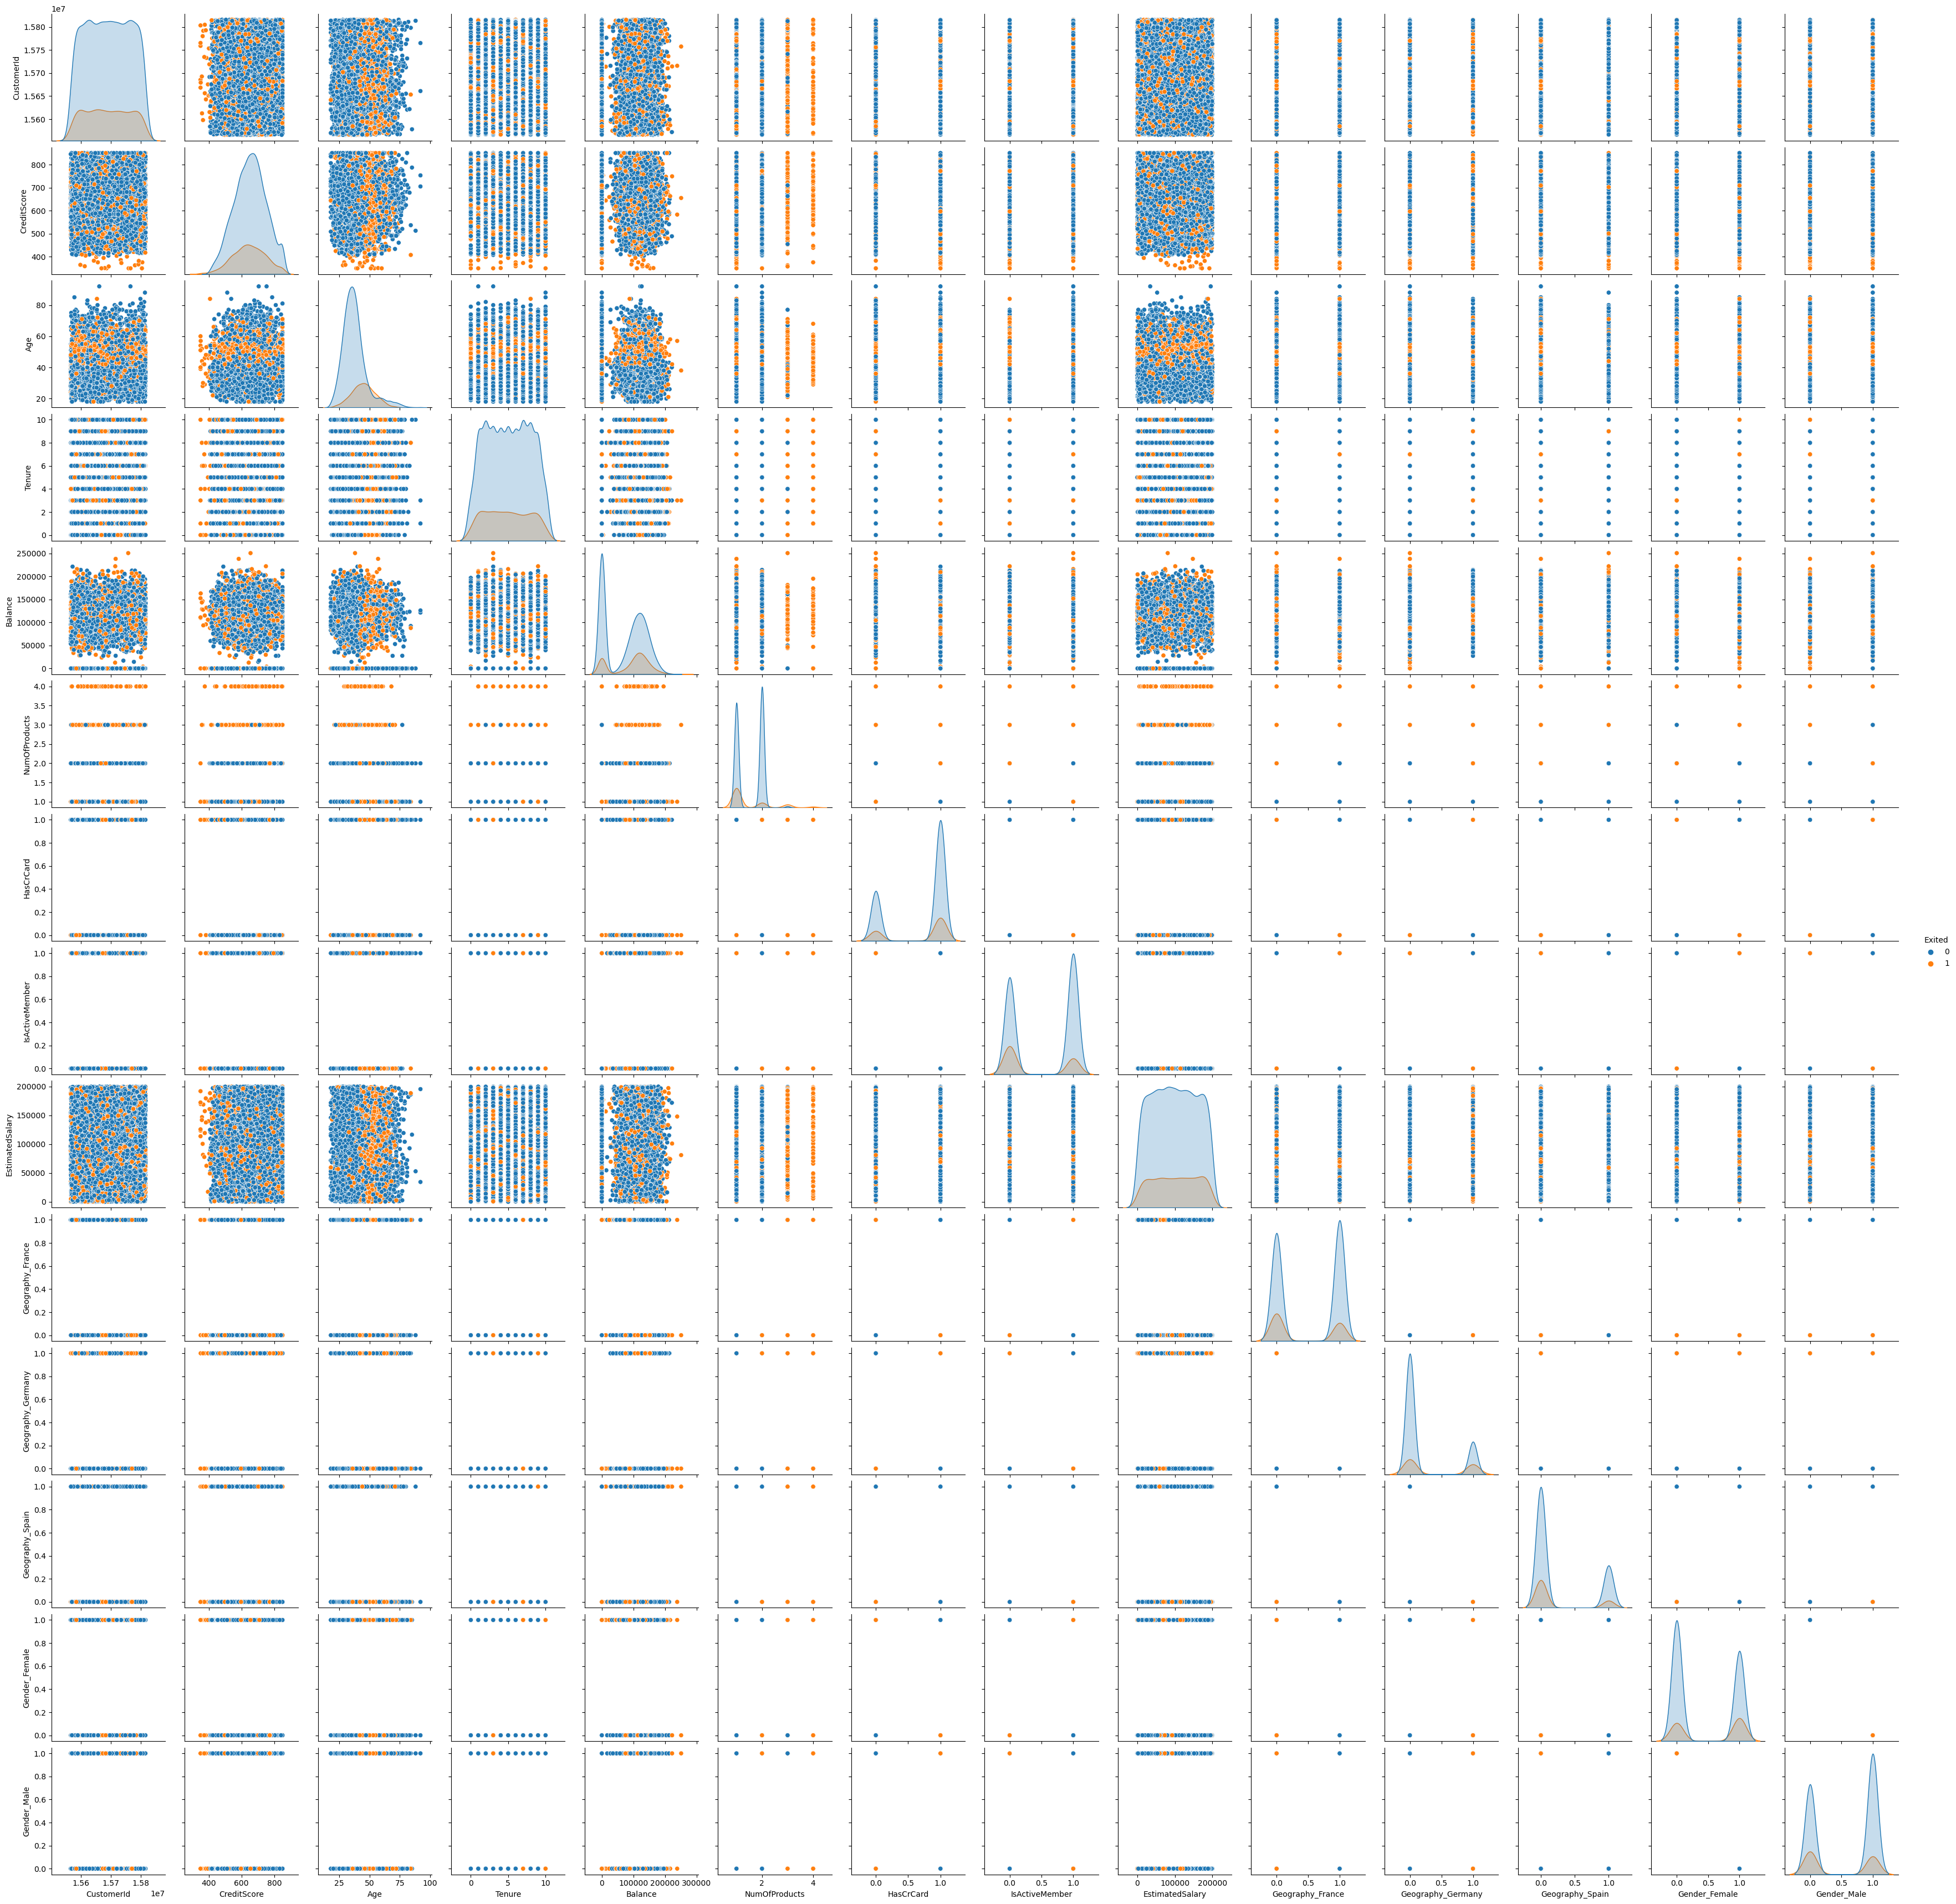

In [27]:
sns.pairplot(df2,hue="Exited")

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(algorithm="auto",weights="distance",n_neighbors=10)

In [29]:
neighbor.fit(x_train_df,y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [30]:
y_pred = neighbor.predict(x_test_df)

In [31]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8355
[[1543  265]
 [  64  128]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1808
           1       0.33      0.67      0.44       192

    accuracy                           0.84      2000
   macro avg       0.64      0.76      0.67      2000
weighted avg       0.90      0.84      0.86      2000



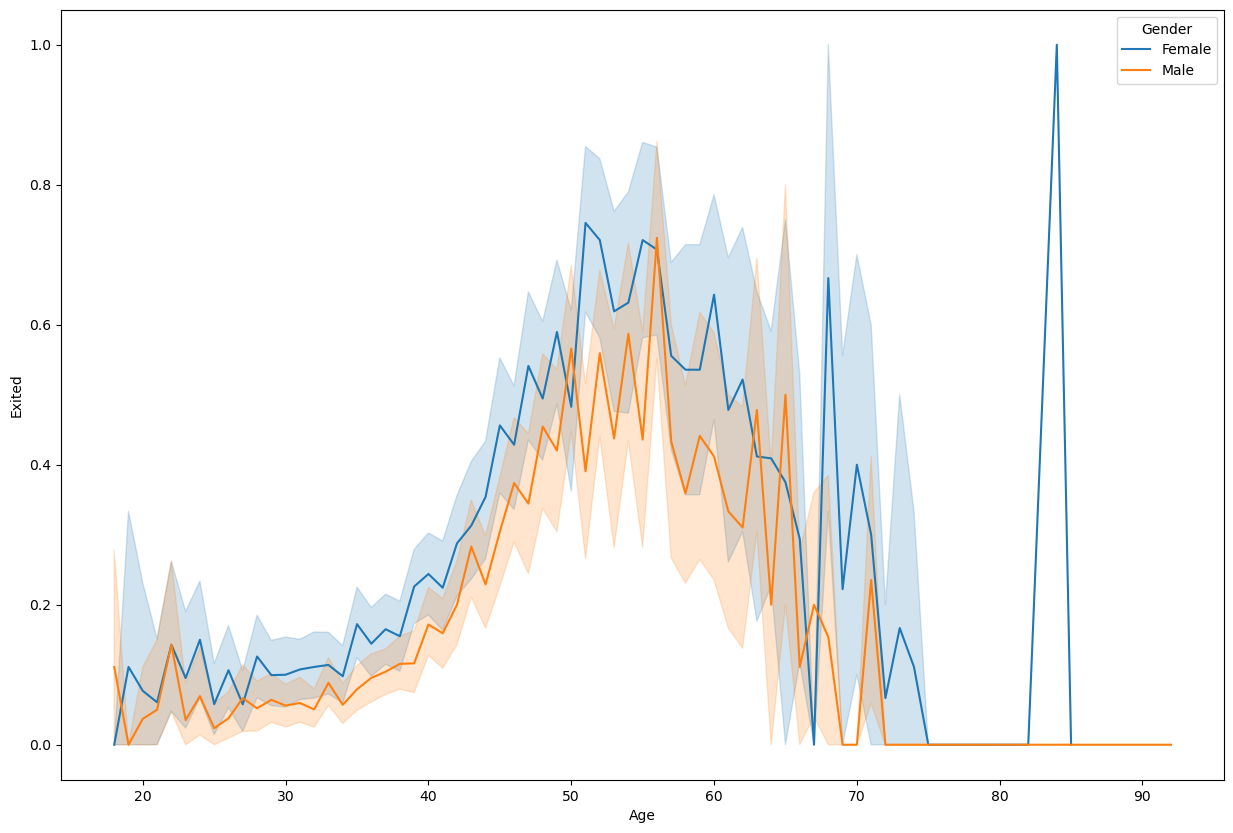

In [34]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Age",y="Exited",data=df,hue="Gender")
plt.show()